In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] =  "0"

In [20]:
from vinorm import TTSnorm
import matplotlib.pyplot as plt
import numpy as np

In [21]:
%matplotlib inline

In [5]:
ref =  "Gắn bó với tuổi thơ, Võ Quảng cũng đã dành hết tâm hồn và tài năng cho những thiên đồng thoại nhỏ nhắn và xinh xắn, hồn nhiên và đậm đà sự sống vui."
ref_norm =  TTSnorm(ref)
ref_norm

'gắn bó với tuổi thơ , võ quảng cũng đã dành hết tâm hồn và tài năng cho những thiên đồng thoại nhỏ nhắn và xinh xắn , hồn nhiên và đậm đà sự sống vui .. '

In [6]:
text =  "Trong khi đó, tại một chung cư trên địa bàn P.Vĩnh Tuy (Q.Hoàng Mai), nhiều người sống trên tầng cao giật mình khi thấy rung lắc mạnh nên đã chạy xuống sảnh tầng 1. Cư dân tại đây cho biết, họ chưa bao giờ cảm thấy ảnh hưởng của động đất mạnh như hôm nay."
text_norm =  TTSnorm(text)
text_norm

'trong khi đó , tại một chung cư trên địa bàn phường vĩnh tuy quận hoàng mai , nhiều người sống trên tầng cao giật mình khi thấy rung lắc mạnh nên đã chạy xuống sảnh tầng một . cư dân tại đây cho biết , họ chưa bao giờ cảm thấy ảnh hưởng của động đất mạnh như hôm nay .. '

In [7]:
from f5tts_wrapper import F5TTSWrapper

# Initialize the F5-TTS wrapper
tts = F5TTSWrapper(
    #model_name="F5TTS_v1_Base",  # Model variant
    vocoder_name="vocos",         # Vocoder type (vocos or bigvgan)
    # If you have a specific checkpoint, uncomment the line below:
    ckpt_path="../../F5-TTS/ckpts/steve_combined_female/model_last.pt",
    vocab_file="../../F5-TTS/data/steve_combined_female_char/vocab.txt",
    use_ema=False,
)

Device set to use cuda


Download Vocos from huggingface charactr/vocos-mel-24khz


In [8]:
ref_audio_path = "/mnt/data01/TTS/F5-TTS/ckpts/steve_combined_female/samples/update_213000_ref.wav"

In [9]:
import IPython
IPython.display.Audio(ref_audio_path)

In [10]:
ref_text =  "Thậm chí không ăn thì cũng có cảm giác rất là cứng bụng, chủ yếu là cái phần rốn...trở lên. Em có cảm giác khó thở, và ngủ cũng không ngon, thường bị ợ hơi rất là nhiều"
ref_text = TTSnorm(ref_text)
ref_text

'thậm chí không ăn thì cũng có cảm giác rất là cứng bụng , chủ yếu là cái phần rốn trở lên . em có cảm giác khó thở , và ngủ cũng không ngon , thường bị ợ hơi rất là nhiều. '

In [11]:
gen_text =  "Biên bản ghi nhớ giữa VFF và CBF có hiệu lực trong 3 năm sau khi bắt đầu và sẽ được tự động gia hạn thêm 2 năm nữa. Trong nội dung của biên bản ghi nhớ, 2 bên cam kết tăng cường hợp tác trong nhiều lĩnh vực nhằm thúc đẩy sự phát triển của bóng đá Việt Nam và Brazil. Cụ thể, 2 liên đoàn sẽ phối hợp tổ chức các cuộc họp, hội nghị bóng đá khu vực và quốc tế; trao đổi chuyên gia, HLV, đội bóng các cấp; đồng thời chia sẻ kinh nghiệm trong quản lý, tổ chức các giải đấu chuyên nghiệp."
gen_text = TTSnorm(gen_text)
gen_text

'biên bản ghi nhớ giữa vff và cbf có hiệu lực trong ba năm sau khi bắt đầu và sẽ được tự động gia hạn thêm hai năm nữa . trong nội dung của biên bản ghi nhớ , hai bên cam kết tăng cường hợp tác trong nhiều lĩnh vực nhằm thúc đẩy sự phát triển của bóng đá việt nam và brazil . cụ thể , hai liên đoàn sẽ phối hợp tổ chức các cuộc họp , hội nghị bóng đá khu vực và quốc tế , trao đổi chuyên gia , huấn luyện viên , đội bóng các cấp , đồng thời chia sẻ kinh nghiệm trong quản lý , tổ chức các giải đấu chuyên nghiệp .. '

In [12]:
# Path to reference audio and output directory
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Preprocess the reference audio just once
# You can provide a reference text, or leave it blank for auto-transcription
tts.preprocess_reference(
    ref_audio_path=ref_audio_path,
    ref_text=ref_text,  # Leave empty for auto-transcription
    clip_short=True  # Clip long audio to ~12 seconds max
)

print(f"Reference audio duration: {tts.get_current_audio_length():.2f} seconds")



Converting audio...
Using custom reference text...

Reference text: thậm chí không ăn thì cũng có cảm giác rất là cứng bụng , chủ yếu là cái phần rốn trở lên . em có cảm giác khó thở , và ngủ cũng không ngon , thường bị ợ hơi rất là nhiều. 
Reference audio duration: 10.70 seconds


In [13]:
sentences =  [
    gen_text
]
for i, sentence in enumerate(sentences):
    output_path = os.path.join(output_dir, f"generated_non_ema_{i+1}.wav")

    sentence_normed  = TTSnorm(sentence)
    
    # Generate the audio
    tts.generate(
        text=sentence_normed,
        output_path=output_path,
        nfe_step=20,               # Number of denoising steps (32)
        cfg_strength=2.0,          # Classifier-free guidance strength (2)
        speed=1.0,                 # Speed of generated speech (1.0)
        cross_fade_duration=0.15,  # Cross-fade between chunks (0.15)
    )
    
    print(f"Generated: {output_path}")



Text batch 0: biên bản ghi nhớ giữa vff và cbf có hiệu lực trong ba năm sau khi bắt đầu và sẽ được tự động gia hạn thêm hai năm nữa . trong nội dung của biên bản ghi nhớ ,
Text batch 1: hai bên cam kết tăng cường hợp tác trong nhiều lĩnh vực nhằm thúc đẩy sự phát triển của bóng đá việt nam và brazil . cụ thể , hai liên đoàn sẽ phối hợp tổ chức các cuộc họp ,
Text batch 2: hội nghị bóng đá khu vực và quốc tế , trao đổi chuyên gia , huấn luyện viên , đội bóng các cấp , đồng thời chia sẻ kinh nghiệm trong quản lý , tổ chức các giải đấu chuyên nghiệp . ..


Generated: output/generated_non_ema_1.wav


In [14]:
# For applications needing the raw audio data rather than saved files:
audio_array, sample_rate = tts.generate(
    text=gen_text,
    return_numpy=True,
    nfe_step=20,               # Number of denoising steps (32)
    cfg_strength=2.0,          # Classifier-free guidance strength (2)
    speed=1.0,                 # Speed of generated speech (1.0)
    cross_fade_duration=0.15,  # Cross-fade between chunks (0.15)
)
print(f"Generated audio array with shape {audio_array.shape} and sample rate {sample_rate}")

# Get audio and spectrogram (useful for visualization)
audio_array, sample_rate, spectrogram = tts.generate(
    text="This returns both audio and its spectrogram.",
    return_numpy=True,
    return_spectrogram=True,
    nfe_step=20,               # Number of denoising steps (32)
    cfg_strength=2.0,          # Classifier-free guidance strength (2)
    speed=1.0,                 # Speed of generated speech (1.0)
    cross_fade_duration=0.15,  # Cross-fade between chunks (0.15)
)
print(f"Generated spectrogram with shape {spectrogram.shape}")


Text batch 0: biên bản ghi nhớ giữa vff và cbf có hiệu lực trong ba năm sau khi bắt đầu và sẽ được tự động gia hạn thêm hai năm nữa . trong nội dung của biên bản ghi nhớ ,
Text batch 1: hai bên cam kết tăng cường hợp tác trong nhiều lĩnh vực nhằm thúc đẩy sự phát triển của bóng đá việt nam và brazil . cụ thể , hai liên đoàn sẽ phối hợp tổ chức các cuộc họp ,
Text batch 2: hội nghị bóng đá khu vực và quốc tế , trao đổi chuyên gia , huấn luyện viên , đội bóng các cấp , đồng thời chia sẻ kinh nghiệm trong quản lý , tổ chức các giải đấu chuyên nghiệp ..


Generated audio array with shape (743904,) and sample rate 24000
Text batch 0: This returns both audio and its spectrogram.


Generated spectrogram with shape (100, 193)


In [22]:
def save_spectrogram(spectrogram):
    plt.figure(figsize=(12, 4))
    plt.imshow(spectrogram, origin="lower", aspect="auto")
    plt.colorbar()
    plt.show()
    plt.close()


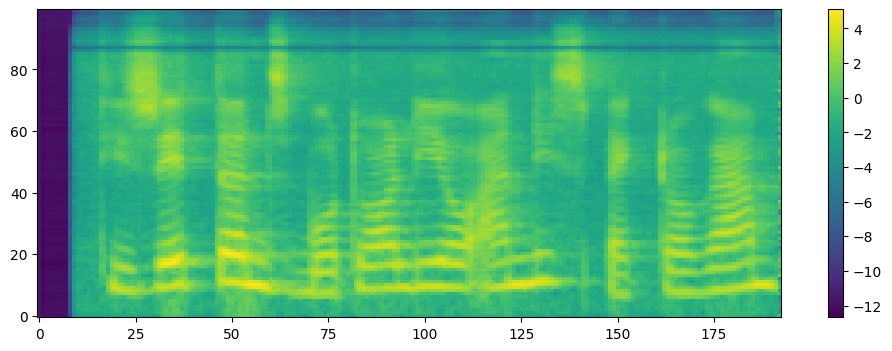

In [23]:
save_spectrogram(spectrogram)